In [45]:
%pip install tensorflow
%pip install scikit-learn
%pip install pandas
%pip install seaborn
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     --------------------- ---------------- 163.8/293.3 kB 3.3 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 3.6 MB/s eta 0:00:00
  Using cached matplotlib-3.7.2-cp310-cp310-win_amd64.whl (7.5 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached pyparsing-3.0.9-py3-none-any.whl (98 kB)
  Using cached kiwisolver-1.4.4-cp310-cp310-win_amd64.whl (55 kB)
  Using cached contourpy-1.1.0-cp310-cp310-win_amd64.whl (470 kB)
     ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
     ------------------- -------------------- 1.0/2.1 MB 22.0 MB/s eta 0:00:01
     ---------------------------------------- 2.1/2.1 MB 26.9 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# 各パス指定

In [46]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [47]:
NUM_CLASSES = 5

# 学習データ読み込み

In [48]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [49]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [51]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [52]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_6 (Dropout)         (None, 42)                0         
                                                                 
 dense_9 (Dense)             (None, 20)                860       
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 5)                 55        
                                                                 
Total params: 1125 (4.39 KB)
Trainable params: 1125 (4.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [53]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [54]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [55]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/29 [>.............................] - ETA: 17s - loss: 1.6789 - accuracy: 0.2891
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 1s 8ms/step - loss: 1.5820 - accuracy: 0.3122 - val_loss: 1.4228 - val_accuracy: 0.4720
Epoch 2/1000
 1/29 [>.............................] - ETA: 0s - loss: 1.4432 - accuracy: 0.3516
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 4ms/step - loss: 1.3935 - accuracy: 0.3761 - val_loss: 1.2956 - val_accuracy: 0.4590
Epoch 3/1000
 1/29 [>.............................] - ETA: 0s - loss: 1.4089 - accuracy: 0.3203

C:\Users\Justin Santos\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 1.3153 - accuracy: 0.3916 - val_loss: 1.1931 - val_accuracy: 0.5613
Epoch 4/1000
 1/29 [>.............................] - ETA: 0s - loss: 1.3179 - accuracy: 0.3594
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 1.2379 - accuracy: 0.4376 - val_loss: 1.1185 - val_accuracy: 0.6125
Epoch 5/1000
 1/29 [>.............................] - ETA: 0s - loss: 1.2732 - accuracy: 0.4141
Epoch 5: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [==============================] - 0s 3ms/step - loss: 1.1817 - accuracy: 0.4693 - val_loss: 1.0521 - val_accuracy: 0.6418
Epoch 6/1000
 1/29 [>.............................] - ETA: 0s - loss: 1.2083 - accuracy: 0.4297
Epoch 6: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
29/29 [=============

In [56]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 [==============================] - 0s 1ms/step - loss: 0.1935 - accuracy: 0.9643


In [57]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [58]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 47ms/step
[9.4767129e-01 4.8667580e-02 3.3044438e-03 3.5247649e-04 4.2983997e-06]
0


# 混同行列

39/39 [==============================] - 0s 856us/step


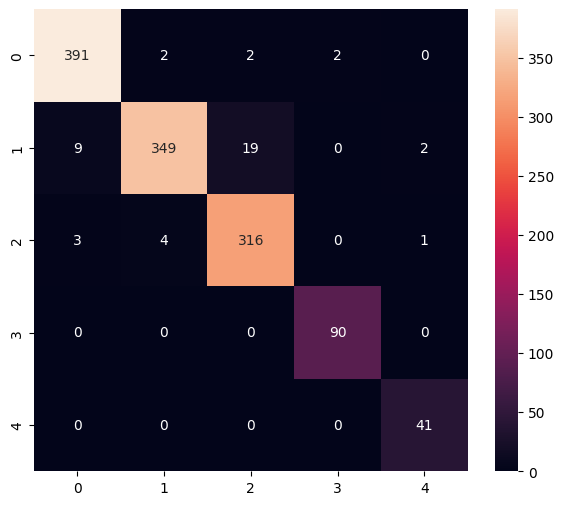

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       397
           1       0.98      0.92      0.95       379
           2       0.94      0.98      0.96       324
           3       0.98      1.00      0.99        90
           4       0.93      1.00      0.96        41

    accuracy                           0.96      1231
   macro avg       0.96      0.98      0.97      1231
weighted avg       0.96      0.96      0.96      1231



In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [60]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

C:\Users\Justin Santos\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [61]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\JUSTIN~1\AppData\Local\Temp\tmppr1vc9oi\assets


INFO:tensorflow:Assets written to: C:\Users\JUSTIN~1\AppData\Local\Temp\tmppr1vc9oi\assets


6640

# 推論テスト

In [62]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [63]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [64]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [65]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 1 ms


In [66]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.4767129e-01 4.8667528e-02 3.3044405e-03 3.5247649e-04 4.2983911e-06]
0
